#Feature Engineering

 Feature engineering is the **process of taking features or predictors in the data and transforming them into a format that improves predictions.**

 Feature engineering is also known as feature extraction. A feature or predictor is a numeric representation of our raw data.

 Features can be continuous or categorical, but feature engineering requires us to look at other aspects of these data. This includes the following:

`Sign`: refers to a feature's positivity or negativity. This can be important when we use aggregated values or count values, like daily visits to a website or to a restaurant.

`Scale`: refers to a feature's size might be. We might need to check if different features span different orders of magnitude since this might affect prediction accuracy.

`Distribution`: refers to how common specific values of a feature are relative to others. We may find that a feature takes values in some typical range, and that there might be outliers that are far away from this typical set.

# Univariate Inputation

The first aspect of feature engineering that we'll learn is resolving missing data. Missing data happens when some feature is difficult to observe or is just not recorded at the time of collection. Missing data is different from having a value like **0** or **False** since these values still encode information about the feature. In Python, None, `null`, or `NaN` values are typically used to represent a **missing value**.

Traning a model on only observations where all the data, after row removed, is present is called a **complete case analysis**. Complete case analysis isn't necessarily a bad thing, but it can result in bias and reduced efficiency in the model if we have to remove large portions of the data.

The alternative to complete case analysis is to try to "fill in" the missing data and train the model on this filled-in dataset. This process is called **imputation**. There are several types of imputation, and they differ in how we try to fill in the missing values. We cannot arbitrarily fill in these missing values with what we personally feel is correct; we need a more principled approach.

The first type of imputation that we'll discuss is **univariate imputation**. As the name suggests, univariate imputation only uses information from a single column to perform the imputation, and this column is usually the one with the missing values.

In univariate imputation, we can choose to fill in missing values based on some statistic such as the mean, median, or mode. These statistics represent the average or most frequent value of a feature, so these are not bad predictions to make.

##Inputer in SkLearn

The scikit-learn library provides objects for us to implement imputation using the `impute` module. Specifically, we'll use the SimpleImputer class.

In order to instantiate a `SimpleImputer()` object, we need to specify two arguments:

`missing_values`: what values indicate missing values?

`strategy`: how should we fill in these missing values?

    from sklearn.impute import SimpleImputer
    imp = SimpleImputer(missing_values=np.nan, strategy="mean")

After we instantiate a `SimpleImputer()` object, we can use it to perform imputation on any dataset we feed it. To do so, we need to use the `fit_transform()` method in the class. This method takes in a dataset with missing values and outputs the same dataset with imputed values.

    data = [[1, np.nan], [2, 5], [np.nan, 6]]
    imputed_data = imp.fit_transform(data)

The `fit_transform()` method of imputer classes like `SimpleImputer` returns an array of arrays.

 Let's convert it to a pandas DataFrame instead.

    imputed_data = pd.DataFrame(imp.fit_transform(data), columns=data.columns)

## Exercise

we found that the `total_bedrooms` column in `housing` has some missing values. Let's use the `SimpleImputer` class to fill in the missing values.

1. Import the SimpleImputer class from the sklearn.impute module.

1. Instantiate a SimpleImputer() object, and assign it to the variable imp.
  * Be sure to correctly identify how the missing values appear in the total_bedrooms column, and use this for the missing_values argument.
  * Use the mean value to fill in missing values.

1. Drop the `ocean_proximity` from the `housing` data. Be sure to reassign the data back to the variable housing.

1. Create an imputed version of the `housing` dataset using `imp`, convert it into a DataFrame, and assign it to the variable `imputed_housing`.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

housing = pd.read_csv('housing.csv')

imp = SimpleImputer(missing_values=np.nan, strategy="mean")

housing = housing.drop(['ocean_proximity'],axis=1)

imputed_housing = pd.DataFrame(imp.fit_transform(housing), columns=housing.columns)

# K-Nearest Neighbors Imputation:

Univariate imputation can help us in some situations, but it's somewhat limiting. We are only using the information from that single column to inform us on how we should impute the missing values. Often, we'll have multiple features in one dataset, and these features are possibly related.

This is the idea behind **K-Nearest Neighbors imputation**. If we are trying to impute a feature for an observation, we should look at other observations that are similar or "close" to it (i.e., its neighbors). If these neighbors have values for the feature of interest, we can make a more educated prediction of what the missing value should be. Specifically, we take the **average** of the neighbor's features and use this to impute for the one with the missing value.

In order to use K-nearest neighbors imputataion, we use the `KNNImputer` class, which is in the impute module from `scikit-learn.` The API for the KNNImputer class is similar to the one for `SimpleImputer`.

1. First, we need to initialize an imputer with some arguments on how we want it to approach imputation.

1. Then, we fit the imputer to the data and allow it to fill in the missing values.



```
from sklearn.impute import KNNImputer
imp = KNNImputer(missing_values=np.nan, n_neighbors=3)
imputed_X = imp.fit_transform(X)
```



In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

housing = pd.read_csv('housing.csv')

imp = KNNImputer(missing_values=np.nan, n_neighbors=3)

housing = housing.drop(['ocean_proximity'],axis=1)

imputed_housing = pd.DataFrame(imp.fit_transform(housing), columns=housing.columns)

# Outlier Detection

 **Outliers** are observations that stand out from the concentration of other observations. As such, outliers can be extremely small or extremely large. Outliers can be troublesome because they can influence the estimation of model parameters, which harms model predictions. Therefore, we might consider removing outliers from our data — or at least being aware of their presence.

 one way we can detect **outliers** is by generating box plots, also known as box and whisker plots. Box plots tell us about the distribution of a feature in terms of its quartiles.

 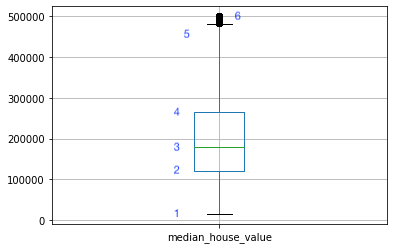

 $Interquatile Range (IQR) = Q3 - Q1$


 $Outliers = Q3 + 1.5*IQR$

 $Outliers = Q1 - 1.5*IQR$

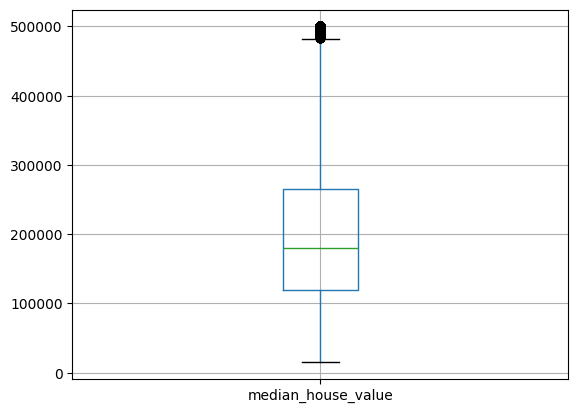

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

housing = pd.read_csv('housing.csv')


percentiles = [25, 50, 75]
mhv_quartiles = np.percentile(housing['median_house_value'], percentiles)

mhv_iqr = mhv_quartiles[2] -  mhv_quartiles[0] #Q3 - Q1

upper_bound =  mhv_quartiles[2] + 1.5*mhv_iqr #Q3 + 1.5*IQR

lower_bound =  mhv_quartiles[0] - 1.5*mhv_iqr #Q1 - 1.5*IQR

mhv_num_outliers = sum((housing['median_house_value'] > upper_bound) | (housing['median_house_value'] < lower_bound))

housing.boxplot("median_house_value")
plt.show()

##Z-Score
On this section, we'll learn another method for detecting outliers based on the
**normal distribution.**

The peak of the bell is centered on the mean of the normal distribution, and the spread of the data around the mean is dictated by its variance.

A normal distribution has several qualities that make it useful for characterizing data. One of these qualities is that normally distributed data are highly concentrated around its mean. Concentration around the mean results in the **68-95-99 rule,** which states the following:

* 68% of normally distributed data falls within 1 standard deviation (i.e., the square root of variance).

* 95% of normally distributed data falls within 2 standard deviations.

* 99% of normally distributed data falls within 3 standard deviations.


Knowing that 99% of normally distributed data is **within three standard deviations** of the mean, we can use this fact to detect outliers. By calculating how many standard deviations each observation is away from the mean, we can use this as our detection method. In other words, we're using the mean and standard deviation of a normal distribution, instead of the quartiles used in the box plot method.

To calculate the number of standard deviations that an observation is away from the mean, we can calculate something called the Z-score. We calculate the **Z-score** as follows:

$\displaystyle Z = \dfrac{(X - \mu)}{\sigma}$





### Finding Outliers

Assuming we have an array of observations from some feature X:

1. Calculate its mean $\mu$  and its standard deviation $σ$.

1. Then, for each observation inX, we subtract the mean and divide by the standard deviation to get the Z-score.

This value actually represents how many standard deviations the original observation is away from the mean. Doing these two operations is also known as **centering** and **scaling**.

Using the 68-95-99 rule, any observation that has a Z-score outside of the range **-3 to 3** will be marked as an outlier.

In [2]:
import numpy as np
import pandas as pd

housing = pd.read_csv('housing.csv')

#mean
mhv_mean = housing['median_house_value'].mean()

#standard deviation
mhv_std = housing['median_house_value'].std()

#z_score
zscores = (housing['median_house_value']-mhv_mean)/mhv_std

#outliers dectection: z_score +- 3
mhv_num_outliers_zscore = sum((zscores >3 ) | (zscores <-3))

#Heuristics

* As mentioned above, if the outlier seems to be the result of a random mistake, then exclude it or use imputation to make a better guess as to the outlier value.

* In the presence of outliers, **repeat the analysis under different circumstances:** try including them, and then try excluding them. There may be a lucky case where the outlier does not really affect the model predictions. Otherwise, it's important to document this finding.

* **Be transparent.** Use either a box plot or the z-score to identify outliers and make it clear in your report how many there are and which columns contain them. If your model predictions seem off, then they might be a potential cause. In either case, documenting whether or not you include them can help your teammates decide how to proceed.

#Imbalanced Dataset (Classification)

 In classification tasks, we know that we have both cases (coded as **1** or **True**) and non-cases (coded as **0** or **False**). When there's an approximately equal number of cases and non-cases, the model can more easily be optimized to distinguish between them.

 However, sometimes we aren't so lucky, and we might encounter a dataset where either the cases or non-cases form a majority of the dataset. This can happen in contexts when cases are uncommon, such as with rare diseases or events. When this happens, we refer to the dataset as being **imbalanced**.

 For example, if a dataset contained 90% non-cases and only 10% cases, a naive classifier might predict that all observations in the dataset are a non-case. The accuracy of this naive classifier would already be 90%, even if we don't use any information in our prediction.

 Imbalance can vary in terms of severity as well. A good heuristic for diagnosing this imbalance is to check the percentage of the minority class, the class with a smaller amount of observations in the data:

  * 20–40% of the data is in the minority class = mild imbalance

  * 1–20% of the data is in the minority class = moderate imbalance

  * < 1% of the data is in the minority class = extreme imbalance

##Engineering Techniques

1. **Downsampling** is the process of reducing the number of majority class observations so that the proportion of the data we use is closer to the proportion of the minority class. To downsample a dataset, we need to choose what proportion of the data we want to be the majority class. Then, we remove enough observations to achieve this.

1. Whereas downsampling involves manipulating the majority class, **upweighting** manipulates the minority class. As its name suggests, upweighting involves giving more "weight" to the minority class. To understand weights, we can think of every observation in a dataset as having a single "vote" of influence. When we train models, each of these observations are treated equally and are used only once. Now, when we upweigh an observation, say one from the minority class, we are giving it more "votes" of influence. Instead of being used only once, an upweighted observation will be used multiple times. As a result, the upweighted minority class will have "more" observations present in the data, without needing to collect more data.

The `LogisticRegression` class in scikit-learn has an argument for changing the weights of each observation: the `class_weight` argument. We can assign it a dictionary of numbers for the weights or, as we recommend, assign it the argument "**balanced**."

This will calculate the weights automatically based on the the class proportions.

    model = LogisticRegression(class_weights="balanced")
    model.fit(X, y)

As a heuristic, the model should be fit **before** we try downsampling and upweighting. If the predictive accuracy is still acceptable on the test set, then they might not be needed in the first place. If not, then we should try them out to see if it improves the model.

In [ ]:
import numpy as np
import pandas as pd

housing = pd.read_csv('housing.csv')
housing["near_ocean"] = 0
housing.loc[housing["ocean_proximity"] == "NEAR OCEAN", "near_ocean"] = 1


n_min = sum(housing["near_ocean"] == 1)

#proportion of 60%
n_maj = int(np.ceil((0.6 / 0.4) * n_min))

#split in two datasets
minority_housing = housing.loc[housing["near_ocean"] == 1]
majority_housing = housing.loc[housing["near_ocean"] == 0]

#downsample majority_housing
downsampled_majority = majority_housing.sample(n=n_maj, random_state=1)

balanced_housing = pd.concat([minority_housing, downsampled_majority])